### Korrelációk az adatok között

In [40]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [48]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [49]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

In [50]:
eu=adatcsv("2020-02-15","2022-12-31",eu_members,["total_tests","new_tests","tests_units","tests_per_case","positive_rate","new_deaths","hosp_patients","reproduction_rate","icu_patients","icu_patients_per_million","hosp_patients_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand","new_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","total_boosters_per_hundred","new_people_vaccinated_smoothed_per_hundred","stringency_index","cardiovasc_death_rate","diabetes_prevalence","excess_mortality_cumulative_absolute","excess_mortality_cumulative","excess_mortality","excess_mortality_cumulative_per_million"])
eu

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,aged_70_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
21149,AUT,Europe,Austria,2020-02-15,NaN,0.0,NaN,NaN,NaN,NaN,...,13.748,45436.686,0.7,28.4,30.9,NaN,7.37,81.54,0.922,8939617
21150,AUT,Europe,Austria,2020-02-16,NaN,0.0,NaN,NaN,NaN,NaN,...,13.748,45436.686,0.7,28.4,30.9,NaN,7.37,81.54,0.922,8939617
21151,AUT,Europe,Austria,2020-02-17,NaN,0.0,NaN,NaN,NaN,NaN,...,13.748,45436.686,0.7,28.4,30.9,NaN,7.37,81.54,0.922,8939617
21152,AUT,Europe,Austria,2020-02-18,NaN,0.0,NaN,NaN,NaN,NaN,...,13.748,45436.686,0.7,28.4,30.9,NaN,7.37,81.54,0.922,8939617
21153,AUT,Europe,Austria,2020-02-19,NaN,0.0,NaN,NaN,NaN,NaN,...,13.748,45436.686,0.7,28.4,30.9,NaN,7.37,81.54,0.922,8939617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327725,SWE,Europe,Sweden,2022-12-27,2671881.0,0.0,22003.0,NaN,NaN,NaN,...,13.433,46949.283,0.5,18.8,18.9,NaN,2.22,82.80,0.945,10549349
327726,SWE,Europe,Sweden,2022-12-28,2671881.0,0.0,22003.0,NaN,NaN,NaN,...,13.433,46949.283,0.5,18.8,18.9,NaN,2.22,82.80,0.945,10549349
327727,SWE,Europe,Sweden,2022-12-29,2671881.0,0.0,22003.0,NaN,NaN,NaN,...,13.433,46949.283,0.5,18.8,18.9,NaN,2.22,82.80,0.945,10549349
327728,SWE,Europe,Sweden,2022-12-30,2671881.0,0.0,22003.0,NaN,NaN,NaN,...,13.433,46949.283,0.5,18.8,18.9,NaN,2.22,82.80,0.945,10549349


In [51]:
last_indexes=[]
for country in eu_members:
    last_occurrence_index = eu[eu['iso_code'] == country].index[-1]
    last_indexes.append(last_occurrence_index)
last_indexes
eu.index

Index([ 21149,  21150,  21151,  21152,  21153,  21154,  21155,  21156,  21157,
        21158,
       ...
       327720, 327721, 327722, 327723, 327724, 327725, 327726, 327727, 327728,
       327729],
      dtype='int64', length=28377)

In [52]:
eu.drop(index=[i for i in eu.index if i not in last_indexes], inplace=True)
eu = eu.drop(["iso_code","continent","location","date","new_cases","handwashing_facilities"], axis=1)

In [53]:
eu

,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
22199,5678345.0,21571.0,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,0.7,28.4,30.9,7.370,81.54,0.922,8939617
32761,4679472.0,33240.0,29498086.0,9259554.0,9162420.0,11602245.0,375.564,41.8,18.571,12.849,42658.576,0.2,25.1,31.4,5.640,81.63,0.931,11655923
50833,1280617.0,38036.0,NaN,NaN,NaN,NaN,65.180,44.7,20.801,13.272,18563.307,1.5,30.1,44.4,7.454,75.05,0.816,6781955
77977,1261766.0,17515.0,5354058.0,2320672.0,2250557.0,NaN,73.726,44.0,19.724,13.053,22669.797,0.7,34.3,39.9,5.540,78.49,0.851,4030361
82495,628509.0,1255.0,NaN,NaN,NaN,NaN,127.657,37.3,13.416,8.563,32415.132,NaN,19.6,52.7,3.400,80.98,0.887,896007
84001,4577526.0,42099.0,18595621.0,6976433.0,6892950.0,5136937.0,137.176,43.3,19.027,11.580,32605.906,NaN,30.5,38.3,6.630,79.38,0.900,10493990
87033,3381851.0,7712.0,NaN,NaN,NaN,NaN,136.520,42.3,19.677,12.325,46682.515,0.2,19.3,18.8,2.500,80.90,0.940,5882259
101946,594217.0,2727.0,2101405.0,868546.0,861016.0,590376.0,31.033,42.7,19.452,13.491,29481.252,0.5,24.5,39.3,4.690,78.74,0.892,1326064
114040,1456149.0,8698.0,NaN,NaN,NaN,NaN,18.136,42.8,21.228,13.264,40585.721,NaN,18.3,22.6,3.280,81.91,0.938,5540745
115546,37989547.0,161667.0,153458028.0,54644454.0,53148866.0,46747038.0,122.578,42.0,19.718,13.079,38605.671,NaN,30.1,35.6,5.980,82.66,0.901,67813000


In [54]:
corr_matrix = eu.corr()

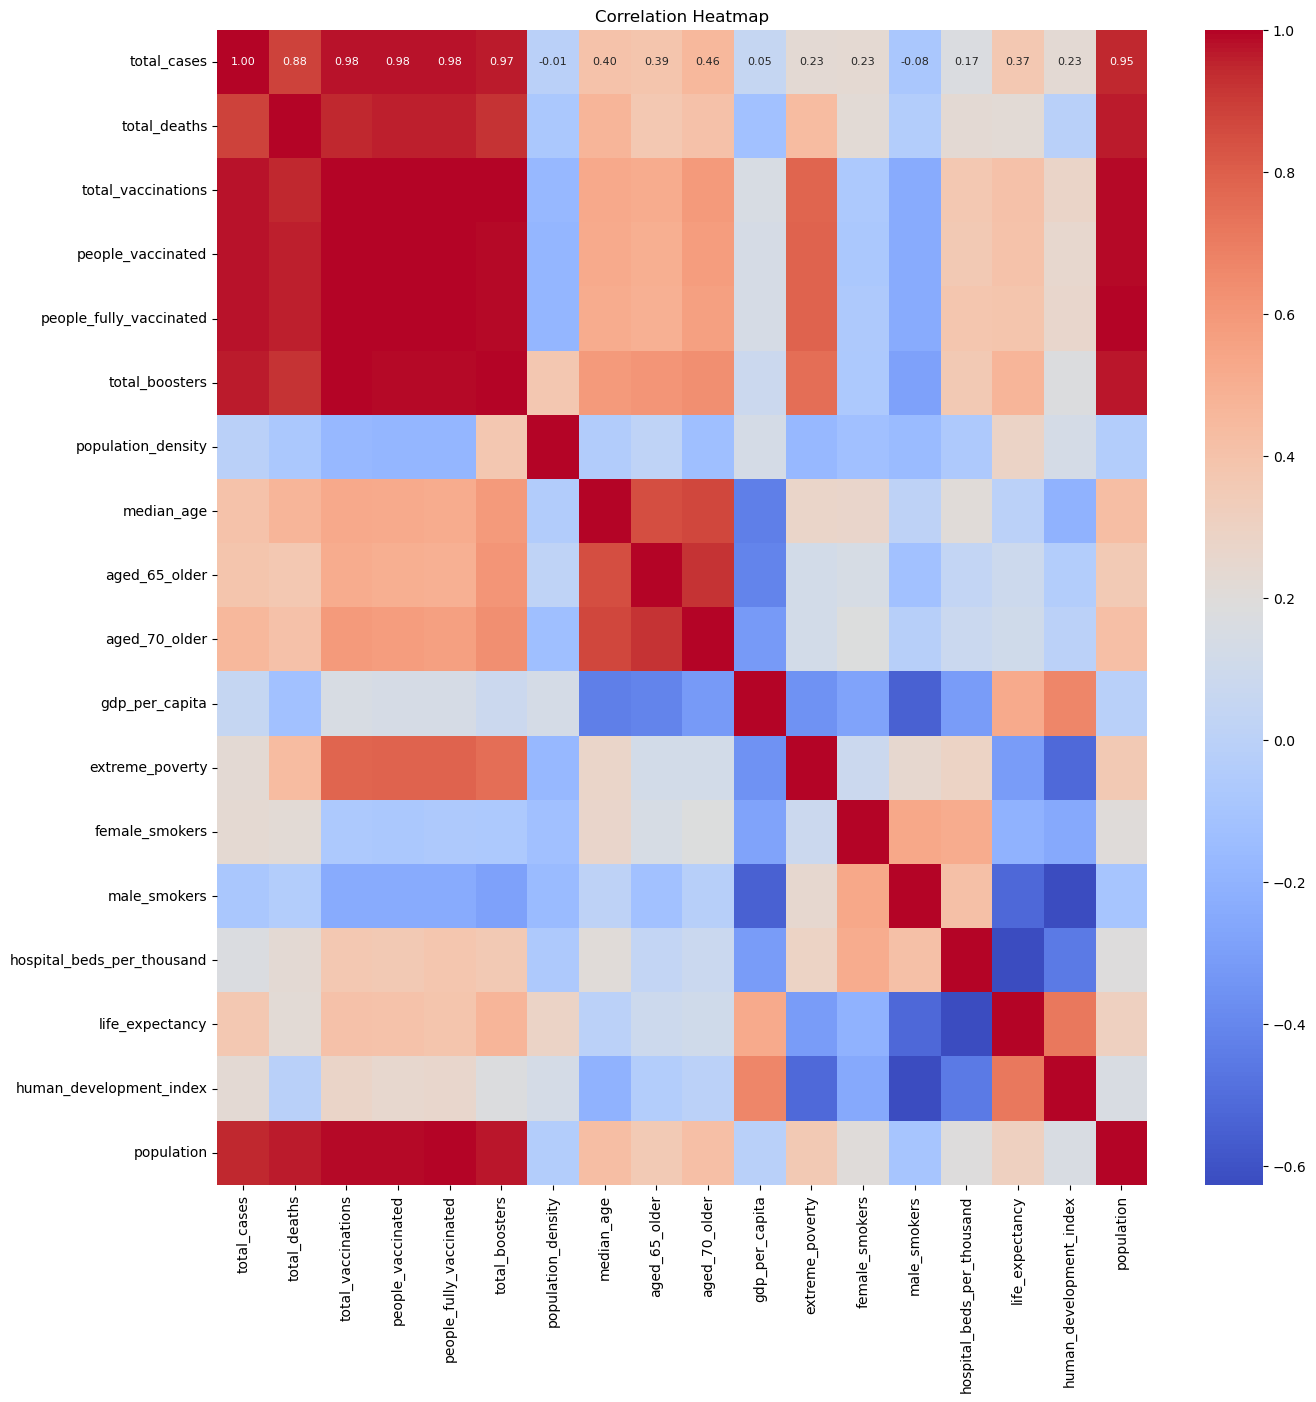

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap')
#for i in range(len(corr_matrix)):
#    for j in range(len(corr_matrix.columns)):
#        text = f'{corr_matrix.iloc[i, j]:.2f}'
#        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10, fontweight='bold')
plt.show()